# Problem Setting

This notebook is used to plot the problem setting for the toy experiment illustrating different resulting distributions of two spheres / rectangles of different sizes after applying various variations of Langevin Monte Carlo (LMC).

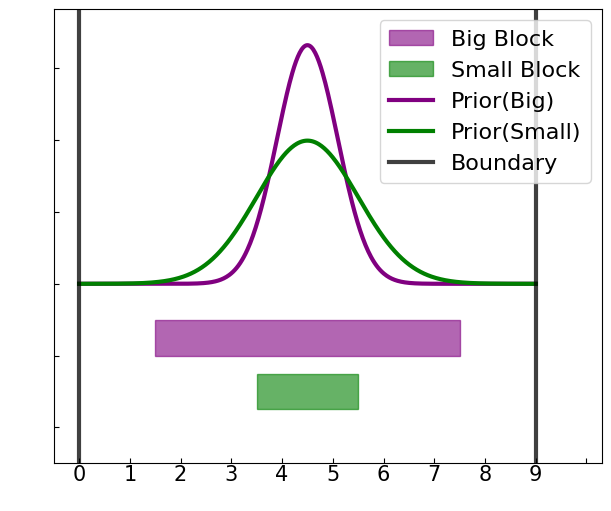

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Config
# ============================

# parameters
length_big   = 6
length_small = 2
center = 4.5

# assign variances such that big block has more central mass (smaller sigma)
sigma_big   = 0.6
sigma_small = 1.0

# X-axis
x = np.linspace(0, 9, 500)

# output
savefile = 'plots/toy_demo.pdf'

# ============================


# Gaussian PDFs
pdf_big   = (1 / (sigma_big * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma_big**2))
pdf_small = (1 / (sigma_small * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma_small**2))

# Create plot
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)


# Draw 1D blocks as colored rectangles
rect_big   = Rectangle((center - length_big / 2, -0.2), length_big, 0.1,
                       color='purple', alpha=0.6, label=f'Big Block')
rect_small = Rectangle((center - length_small / 2, -0.35), length_small, 0.1,
                       color='green', alpha=0.6, label=f'Small Block')

ax.add_patch(rect_big)
ax.add_patch(rect_small)

# Plot distributions
ax.plot(x, pdf_big, color='purple', label=f'Prior(Big)', linewidth=3)
ax.plot(x, pdf_small, color='green', label=f'Prior(Small)', linewidth=3)

# Mark boundaries
ax.axvline(0, color='black', linestyle='-', linewidth=3, alpha=0.75)
ax.axvline(9, color='black', linestyle='-', linewidth=3, alpha=0.75, label='Boundary')

ax.set_xlim(-0.5, 10.3)
ax.set_ylim(-0.5, max(pdf_big.max(), pdf_small.max()) + 0.1)
ticks = np.arange(0, 11)
labels = [str(i) if i <= 9 else "" for i in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, fontsize=20)
ax.set_yticklabels([])
ax.legend(loc='upper right', fontsize=16)

# set invinsible  dummy texts for alignment
ax.set_xlabel("N/A", fontsize=11, color="white")
ax.set_ylabel("N/A\nN/A", fontsize=14, color="white")

# tighter tick-label padding for paper
ax.margins(x=0, y=0)
ax.tick_params(pad=1, direction='in', labelsize=15)
ax.xaxis.labelpad = 1
ax.yaxis.labelpad = 1

plt.show()


In [2]:
savedir = os.path.dirname(savefile)
os.makedirs(savedir, exist_ok=True)

fig.savefig(savefile, dpi=300, bbox_inches='tight', format='pdf', pad_inches=0)